##Installing the required packages

In [ ]:
!pip install uncertainty-toolbox
!pip install gpytorch==1.5.1
!pip install netcal
# !pip install --upgrade torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.1/503.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

##Importing the packages

In [ ]:
import numpy as np
import uncertainty_toolbox as uct
import matplotlib.pyplot as plt

##Loading the results generated from EGNN-DER training

In [ ]:
data_val_001  = np.load('DER_QM9_val_0.01.npz')
data_test_001 = np.load('DER_QM9_test_0.01.npz')

In [ ]:
for key, val in data_val_001.items():
    print(key, val.shape)

preds (13083,)
targets (13083,)
std (13083,)
std_al (13083,)
std_ep (13083,)


In [ ]:
pred_val_001 = data_val_001['preds']
targets_val_001 = data_val_001['targets']
std_val_001 = data_val_001['std']
pred_test_001 = data_test_001['preds']
targets_test_001 = data_test_001['targets']
std_test_001 = data_test_001['std']

In [ ]:
# Plot settings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

mpl.rcParams['figure.figsize'] = [7.8,5.9]
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 15

# plt.style.use('seaborn-white')
# sns.set(color_codes=False)

legend_settings = {'loc':'upper center', 'ncol':3, 'frameon':True, 'facecolor':'white',
                   'framealpha':0.8, 'bbox_to_anchor':(0.5, 1.11)}

##Calibartion Quantification and Recalicalibration analysis

For the validation dataset of the QM9 dataset, which is 10%

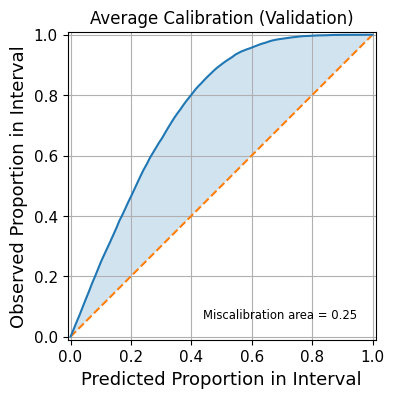

In [ ]:
uct.viz.plot_calibration(pred_val_001, std_val_001, targets_val_001)
plt.gcf().set_size_inches(4, 4)
plt.title('Average Calibration (Validation)')
plt.grid()
plt.savefig('calibration_val_001_QM9.png', dpi=600, bbox_inches='tight')

For the test dataset of the QM9 dataset, which is also 10%

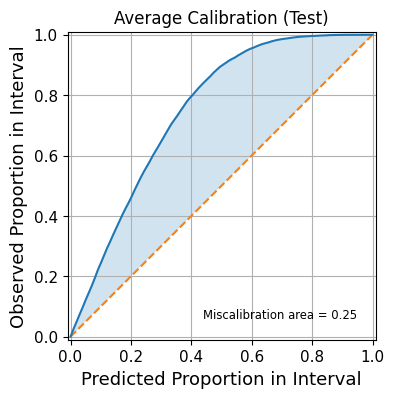

In [ ]:
uct.viz.plot_calibration(pred_test_001, std_test_001, targets_test_001)
plt.gcf().set_size_inches(4, 4)
plt.title('Average Calibration (Test)')
plt.grid()
plt.savefig('calibration_test_001_QM9.png', dpi=600, bbox_inches='tight')

Uncertainty Quantification metrics for the test dataset results

In [ ]:
pnn_metrics = uct.metrics.get_all_metrics(pred_test_001, std_test_001, targets_test_001)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.578
  RMSE          2.657
  MDAE          0.401
  MARPD         0.061
  R2            1.000
  Correlation   1.000
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.278
  Mean-absolute Calibration Error       0.247
  Miscalibration Area                   0.250
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.254
     Group Size: 0.56 -- Calibration Error: 0.250
     Group Size: 1.00 -- Calibration Error: 0.247
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.286
     Group Size: 0.56 -- Calibration Error: 0.280
     Group Size: 1.00 -- Calibration Error: 0.278
================

##Isotonic Regression Post hoc calibration

Applying post-hoc: calibration on the test dataset using the validation dataset with isotonic regression (ISR).

Obs props not ideal: from 0.00015287013681877245 to 1.0


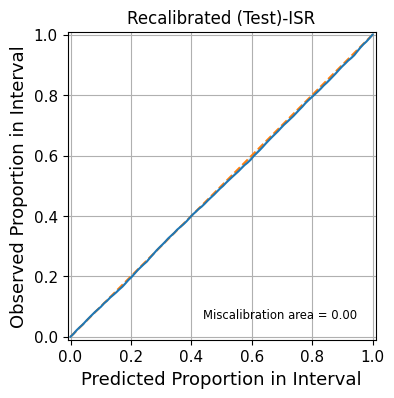

In [ ]:
recal_pred_mean = pred_val_001.flatten()
recal_pred_std = std_val_001.flatten()
recal_y = targets_val_001.flatten()
exp_props, obs_props = uct.metrics_calibration.get_proportion_lists_vectorized(
    recal_pred_mean, recal_pred_std, recal_y,
)

# Train a recalibration model.
recal_model = uct.recalibration.iso_recal(exp_props, obs_props)

# Get the expected props and observed props using the new recalibrated model
te_recal_exp_props, te_recal_obs_props = uct.metrics_calibration.get_proportion_lists_vectorized(
    pred_test_001, std_test_001, targets_test_001, recal_model=recal_model
)

# Show the updated average calibration plot
uct.viz.plot_calibration(pred_test_001, std_test_001, targets_test_001,
                         exp_props=te_recal_exp_props,
                         obs_props=te_recal_obs_props)

plt.gcf().set_size_inches(4, 4)
plt.title('Recalibrated (Test)-ISR')
plt.grid()
plt.savefig('Recalibrated_Test_QM9.png', dpi=600, bbox_inches='tight')

In [ ]:
recal_bounds_1sig = uct.metrics_calibration.get_prediction_interval(
    pred_test_001.flatten(), std_test_001.flatten(), 0.6827, recal_model)

isr_std_1sig = (recal_bounds_1sig.upper - recal_bounds_1sig.lower) / 2.0

adversarial group calibration after performing post-hoc calibration with ISR

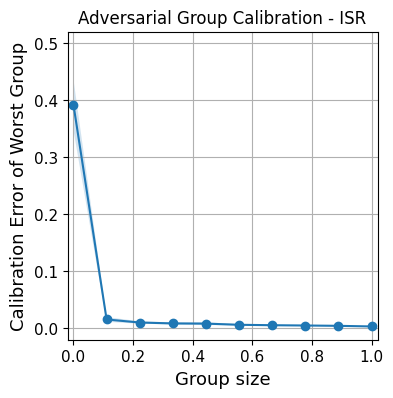

In [ ]:
uct.viz.plot_adversarial_group_calibration(pred_test_001, isr_std_1sig, targets_test_001)
plt.gcf().set_size_inches(4, 4)
plt.grid()
plt.title('Adversarial Group Calibration - ISR')
plt.savefig('AGC_ISR_Reclibrated.png', dpi=600, bbox_inches='tight')

In [ ]:
# Get all metrics
pnn_metrics = uct.metrics.get_all_metrics(pred_test_001, isr_std_1sig, targets_test_001)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.578
  RMSE          2.657
  MDAE          0.401
  MARPD         0.061
  R2            1.000
  Correlation   1.000
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.004
  Mean-absolute Calibration Error       0.003
  Miscalibration Area                   0.003
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.015
     Group Size: 0.56 -- Calibration Error: 0.007
     Group Size: 1.00 -- Calibration Error: 0.003
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.017
     Group Size: 0.56 -- Calibration Error: 0.008
     Group Size: 1.00 -- Calibration Error: 0.004
================

##Standard Scaling post hoc calibration

Performing the standard scaling post hoc calibration the using the validation dataset to compute the scaling factor

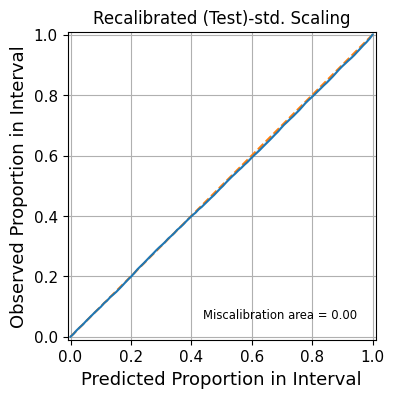

In [ ]:
std_scaling = uct.recalibration.optimize_recalibration_ratio(
      recal_pred_mean, recal_pred_std, recal_y, criterion="miscal"
)
new_pred_stds = std_scaling * std_test_001
 # Show the updated average calibration plot
uct.viz.plot_calibration(pred_test_001, new_pred_stds, targets_test_001)
plt.gcf().set_size_inches(4, 4)
plt.title('Recalibrated (Test)-std. Scaling')
plt.grid()
plt.savefig('Recalibrated_test_QM9_std_scaling.png', dpi=600, bbox_inches='tight')

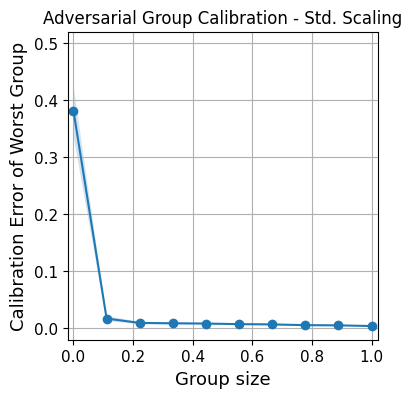

In [ ]:
uct.viz.plot_adversarial_group_calibration(pred_test_001, std_scaling * std_test_001, targets_test_001)
plt.gcf().set_size_inches(4, 4)
plt.grid()
plt.title('Adversarial Group Calibration - Std. Scaling')
plt.savefig('AGC_SS_Reclibrated.png', dpi=600, bbox_inches='tight')
# plt.title('Recalibrated (Test)-ISR')

In [ ]:
# Get all metrics
pnn_metrics = uct.metrics.get_all_metrics(pred_test_001, std_scaling * std_test_001, targets_test_001)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.578
  RMSE          2.657
  MDAE          0.401
  MARPD         0.061
  R2            1.000
  Correlation   1.000
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.005
  Mean-absolute Calibration Error       0.004
  Miscalibration Area                   0.004
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.015
     Group Size: 0.56 -- Calibration Error: 0.007
     Group Size: 1.00 -- Calibration Error: 0.004
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.016
     Group Size: 0.56 -- Calibration Error: 0.008
     Group Size: 1.00 -- Calibration Error: 0.005
================

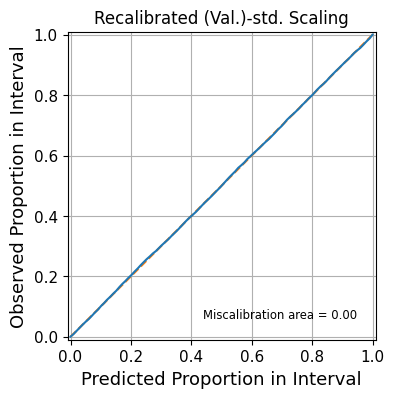

In [ ]:
uct.viz.plot_calibration(pred_val_001, std_val_001 * std_scaling, targets_val_001)
plt.gcf().set_size_inches(4, 4)
plt.title('Recalibrated (Val.)-std. Scaling')
plt.grid()
plt.savefig('Recalibrated_val_QM9_std_scaling.png', dpi=600, bbox_inches='tight')

##GPNormal Post hoc calibration

In [ ]:
from torch.utils.tensorboard import SummaryWriter
from netcal import manual_seed, cumulative_moments
from netcal.regression import IsotonicRegression, VarianceScaling, GPBeta, GPNormal, GPCauchy
from netcal.metrics import NLL, ENCE, UCE, QCE, PinballLoss
from netcal.presentation import ReliabilityRegression
from examples.regression.artificial import generate_variance_dependent, generate_mean_dependent, draw_distributions

manual_seed(0)

bins = 20  # used for evaluation metrics
quantiles = np.linspace(0.05, 0.95, 19)  # quantile levels, used for evaluation metrics
n_epochs = 200  # optimization epochs
use_cuda = False  # or: "cuda:0", "cuda:1", etc.
# initialize tensorboard logging
tensorboard = SummaryWriter("logs/netcal/regression/artificial")
reliability = ReliabilityRegression(quantiles=bins+1)
figures = []

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/gpytorch/lazy/triangular_lazy_tensor.py:124: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2190.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution
Loss: 0.9333: 100%|██████████| 50/50 [03:30<00:00,  4.21s/it]


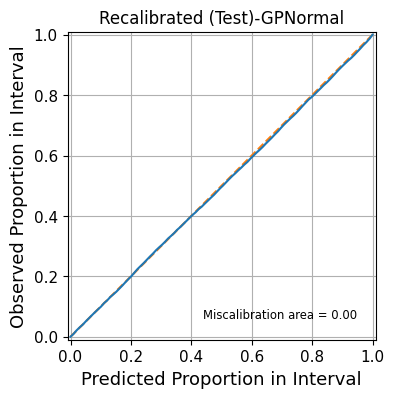

In [ ]:
gpnormal = GPNormal(n_inducing_points=50, n_random_samples=256, n_epochs=50, use_cuda=use_cuda)
gpnormal.fit((pred_val_001.reshape(-1, 1), std_val_001.reshape(-1, 1)), targets_val_001.reshape(-1, 1), tensorboard=tensorboard)
ystd_gpnormal = gpnormal.transform((pred_test_001, std_test_001))

# squeeze calibrated stddev
ymean_gpnormal = pred_test_001
# ystd_gpnormal = ystd_gpnormal[..., 0]

uct.viz.plot_calibration(ymean_gpnormal.ravel(), ystd_gpnormal.ravel(), targets_test_001.ravel())
plt.gcf().set_size_inches(4, 4)
plt.title('Recalibrated (Test)-GPNormal')
plt.grid()
plt.savefig('Recalibrated_test_QM9_GPNormal.png', dpi=600, bbox_inches='tight')

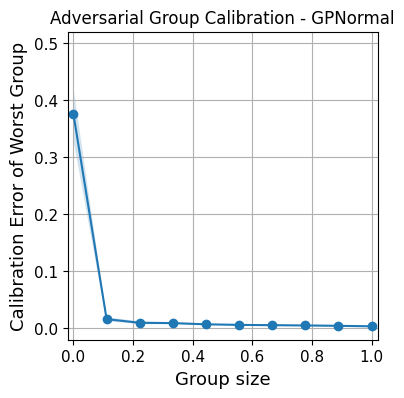

In [ ]:
uct.viz.plot_adversarial_group_calibration(pred_test_001, ystd_gpnormal.ravel(), targets_test_001)
plt.gcf().set_size_inches(4, 4)
plt.grid()
plt.title('Adversarial Group Calibration - GPNormal')
plt.savefig('AGC_GPNormal_Reclibrated.png', dpi=600, bbox_inches='tight')

In [ ]:
# Get all metrics
pnn_metrics = uct.metrics.get_all_metrics(pred_test_001, ystd_gpnormal.ravel(), targets_test_001)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:05<00:00,  1.81it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.578
  RMSE          2.657
  MDAE          0.401
  MARPD         0.061
  R2            1.000
  Correlation   1.000
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.004
  Mean-absolute Calibration Error       0.003
  Miscalibration Area                   0.004
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.015
     Group Size: 0.56 -- Calibration Error: 0.006
     Group Size: 1.00 -- Calibration Error: 0.003
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.017
     Group Size: 0.56 -- Calibration Error: 0.008
     Group Size: 1.00 -- Calibration Error: 0.004
================

##Finding low uncertainty points

Uncalibrated data, which is underconfident when uncertainty is high.

In [ ]:
indices = np.where(2 * std_test_001 < 1)[0]
print('Low uncertainty samples:', indices.shape)

large_diff_indices = np.where(np.abs(pred_test_001.ravel()[indices] - targets_test_001.ravel()[indices]) > 1)[0]
print("Number of false positives with |prediction - true value| > 1:", large_diff_indices.shape[0])

Low uncertainty samples: (0,)
Number of false positives with |prediction - true value| > 1: 0


EGNN-DER model is uncertain about all the points

In [ ]:
recal_bounds_2sig = uct.metrics_calibration.get_prediction_interval(
    pred_test_001.flatten(), std_test_001.flatten(), 0.9545, recal_model)

isr_std_2sig = (recal_bounds_2sig.upper - recal_bounds_2sig.lower) / 2.0

After calibration with ISR, we can see, the uncertainty is modified and there are low uncertainty points

In [ ]:
threshold = 1
tolerance = 0

indices = np.where(isr_std_2sig + tolerance < threshold)[0]

# Find the points classified as "false positives" based on your tolerance and criterion
false_indices = np.where(np.abs(pred_test_001.ravel()[indices] - targets_test_001.ravel()[indices]) > tolerance + 1 * (isr_std_2sig.ravel()[indices]))[0]
print('Uncertain Samples:', indices.shape[0])

large_diff_indices = np.where(np.abs(pred_test_001.ravel()[indices] - targets_test_001.ravel()[indices]) > 1)[0]
print("Number of false positives with |prediction - true value| > 1:", large_diff_indices.shape[0])

Uncertain Samples: 3307
Number of false positives with |prediction - true value| > 1: 86


Uncertain Samples: 3307
Number of false positives with |prediction - true value| > 1: 86


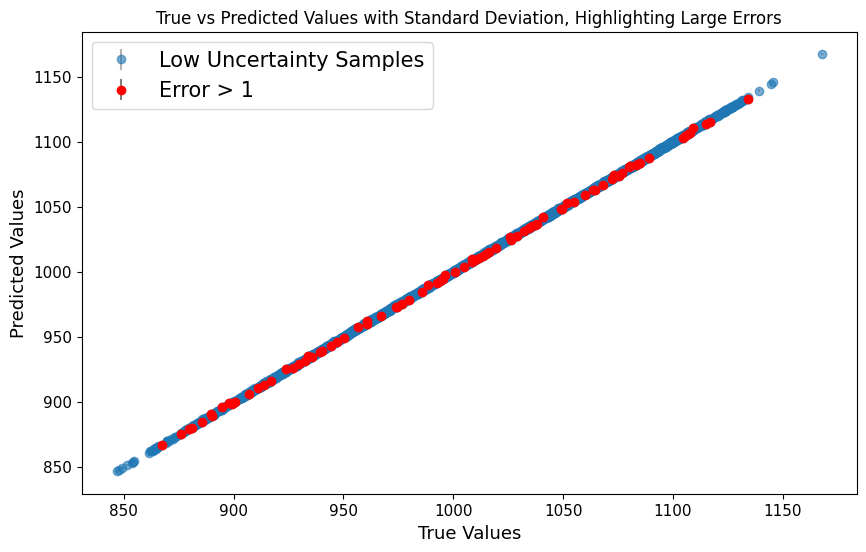

In [ ]:
threshold = 1
tolerance = 0

# Find indices with low uncertainty where 2 * std_dev + tolerance < threshold
indices = np.where(1 * isr_std_2sig + tolerance < threshold)[0]
print('Uncertain Samples:', indices.shape[0])

# Find points where |prediction - true value| > tolerance + 2 * std deviation
# false_indices = np.where(np.abs(pred_test_001[indices] - targets_test_001[indices]) > tolerance + 2 * isr_std_67[indices])[0]
# print("Number of uncertain false positives:", false_indices.shape[0])

# Find indices where error exceeds 1
large_diff_indices = np.where(np.abs(pred_test_001[indices] - targets_test_001[indices]) > 1)[0]
print("Number of false positives with |prediction - true value| > 1:", large_diff_indices.shape[0])

# Plotting
plt.figure(figsize=(10, 6))

# Plot low-uncertainty points (2*std_dev + tolerance < threshold) with error bars in blue
plt.errorbar(
    targets_test_001[indices],
    pred_test_001[indices],
    yerr=isr_std_2sig[indices],
    fmt='o',
    ecolor='gray',
    alpha=0.6,
    label='Low Uncertainty Samples'
)

# Highlight points with errors exceeding 1 in red with error bars
plt.errorbar(
    targets_test_001[indices][large_diff_indices],
    pred_test_001[indices][large_diff_indices],
    yerr=isr_std_2sig[indices][large_diff_indices],
    fmt='o',
    color='red',
    ecolor='gray',
    label='Error > 1'
)

plt.figsize=(6, 6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values with Standard Deviation, Highlighting Large Errors")
plt.legend()
plt.show()

In [ ]:
threshold = 1
tolerance = 0.0

indices = np.where(2 * new_pred_stds + tolerance < threshold)[0]

# Find the points classified as "false positives" based on your tolerance and criterion
false_indices = np.where(np.abs(pred_test_001.ravel()[indices] - targets_test_001.ravel()[indices]) > tolerance + 2 * (new_pred_stds.ravel()[indices]))[0]
print('Uncertain Samples:', indices.shape[0])

large_diff_indices = np.where(np.abs(pred_test_001.ravel()[indices] - targets_test_001.ravel()[indices]) > 1)[0]
print("Number of false positives with |prediction - true value| > 1:", large_diff_indices.shape[0])


Uncertain Samples: 3766
Number of false positives with |prediction - true value| > 1: 115


In [ ]:
threshold = 1
tolerance = 0.0

indices = np.where(2 * ystd_gpnormal + tolerance < threshold)[0]

# Find the points classified as "false positives" based on your tolerance and criterion
false_indices = np.where(np.abs(pred_test_001.ravel()[indices] - targets_test_001.ravel()[indices]) > tolerance + 2 * (ystd_gpnormal.ravel()[indices]))[0]
print('Uncertain Samples:', indices.shape[0])

large_diff_indices = np.where(np.abs(pred_test_001.ravel()[indices] - targets_test_001.ravel()[indices]) > 1)[0]
print("Number of false positives with |prediction - true value| > 1:", large_diff_indices.shape[0])


Uncertain Samples: 3706
Number of false positives with |prediction - true value| > 1: 112


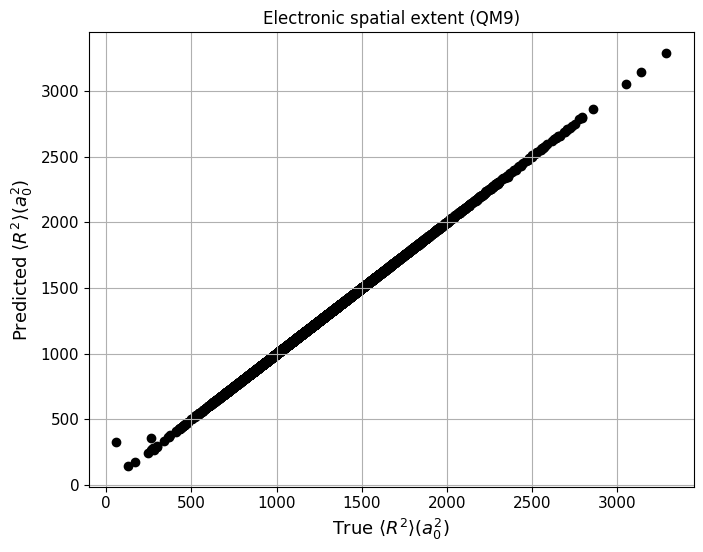

In [ ]:
plt.scatter(targets_test_001, pred_test_001, c='k')
# print(r2_score(targets_test_001, pred_test_001))
# print(mean_absolute_error(targets_test_001, pred_test_001))
plt.ylabel("Predicted $\langle R^2 \\rangle (a_{0}^2)$")
plt.xlabel("True $\langle R^2 \\rangle (a_{0}^2)$")
plt.grid()
plt.title('Electronic spatial extent (QM9)')
plt.savefig('DER_QM9_test_0.01.png', dpi=600, bbox_inches='tight')
# plt.show()

In [ ]:
# mean_uncertainty = np.mean(isr_std_2sig)
# std_uncertainty = np.std(isr_std_2sig)
# threshold = mean_uncertainty + 3 * std_uncertainty  # Adjust the multiplier as needed (e.g., 2 or 3)

# # Create a mask to identify non-outlier data
# non_outliers_mask = isr_std_2sig <= threshold

# # Filter the arrays based on the mask
# filtered_targets_test_001 = targets_test_001[non_outliers_mask]
# filtered_pred_test_001 = pred_test_001[non_outliers_mask]
# filtered_isr_std_2sig = isr_std_2sig[non_outliers_mask]
# filtered_std = std_test_001[non_outliers_mask]

# # Print the resulting arrays
# print("Filtered Targets Test 0.01:", filtered_targets_test_001)
# print("Filtered Predictions Test 0.01:", filtered_pred_test_001)

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming you have uncertainty values for the test set
# # Replace `uncertainty_values` with your actual uncertainty data
# # uncertainty_values should be a 1D array with the same length as targets_test_001 and pred_test_001
# uncertainty_values = ...  # Your uncertainty data here

# scatter = plt.scatter(
#     filtered_targets_test_001, filtered_pred_test_001,
#     c=filtered_isr_std_2sig, cmap='viridis', s=20, edgecolor='k'
# )

# # Add a colorbar to the plot
# cbar = plt.colorbar(scatter)
# cbar.set_label('Uncertainty')

# plt.ylabel("Predicted $\langle R^2 \\rangle (a_{0}^2)$")
# plt.xlabel("True $\langle R^2 \\rangle (a_{0}^2)$")
# plt.grid()
# plt.title('Electronic spatial extent (QM9) with Uncertainty')
# plt.savefig('DER_QM9_test_0.01_with_uncertainty.png', dpi=600, bbox_inches='tight')
# # plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming you have uncertainty values for the test set
# # Replace `uncertainty_values` with your actual uncertainty data
# # uncertainty_values should be a 1D array with the same length as targets_test_001 and pred_test_001
# uncertainty_values = ...  # Your uncertainty data here

# scatter = plt.scatter(
#     filtered_targets_test_001, filtered_pred_test_001,
#     c=filtered_std, cmap='viridis', s=20, edgecolor='k'
# )

# # Add a colorbar to the plot
# cbar = plt.colorbar(scatter)
# cbar.set_label('Uncertainty')

# plt.ylabel("Predicted $\langle R^2 \\rangle (a_{0}^2)$")
# plt.xlabel("True $\langle R^2 \\rangle (a_{0}^2)$")
# plt.grid()
# plt.title('Electronic spatial extent (QM9) with Uncertainty')
# plt.savefig('DER_QM9_test_0.01_with_uncertainty.png', dpi=600, bbox_inches='tight')
# # plt.show()

In [ ]:
# pnn_metrics = uct.metrics.get_all_metrics(filtered_pred_test_001, filtered_isr_std_2sig/2.0, filtered_targets_test_001)

In [ ]:
# uct.viz.plot_calibration(pred_test_001, isr_std_2sig/2.0, targets_test_001)
# plt.gcf().set_size_inches(4, 4)
# plt.title('Recalibration (ISR)')
# plt.grid()
# plt.savefig('Recalibrated_val_QM9_std_scaling.png', dpi=600, bbox_inches='tight')

In [ ]:
# uct.viz.plot_calibration(filtered_pred_test_001, filtered_isr_std_2sig/2.0, filtered_targets_test_001)
# plt.gcf().set_size_inches(4, 4)
# plt.title('Recalibrated Filtered')
# plt.grid()
# plt.savefig('Recalibrated_val_QM9_std_scaling.png', dpi=600, bbox_inches='tight')

In [ ]:
# Plot settings
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns

%matplotlib inline

mpl.rcParams['figure.figsize'] = [7.8,5.9]
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['legend.fontsize'] = 15

# plt.style.use('seaborn-white')
# sns.set(color_codes=False)

legend_settings = {'loc':'upper center', 'ncol':3, 'frameon':True, 'facecolor':'white',
                   'framealpha':0.8, 'bbox_to_anchor':(0.5, 1.11)}

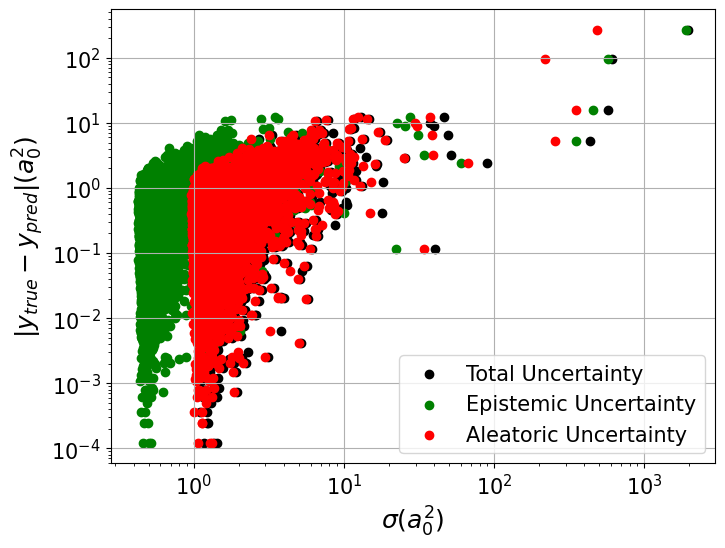

In [ ]:
plt.scatter(y=np.abs(targets_test_001 - pred_test_001), x=data_test_001['std'], c='k', label='Total Uncertainty')
plt.scatter(y=np.abs(targets_test_001 - pred_test_001), x=data_test_001['std_ep'], c='g', label='Epistemic Uncertainty')
plt.scatter(y=np.abs(targets_test_001 - pred_test_001),x=data_test_001['std_al'], c='r', label='Aleatoric Uncertainty')
plt.grid()
plt.ylabel('$|y_{true} - y_{pred}| (a_{0}^2)$', fontsize=18)
plt.xlabel('$\sigma (a_{0}^2)$', fontsize=18)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.savefig('Uncertainty_estimates_QM9_DER.png', dpi=600, bbox_inches='tight')
# plt.show()

##Other metrics

In [ ]:
mean = pred_test_001.reshape(-1, 1)
stddev = std_test_001.reshape(-1, 1)
ground_truth = targets_test_001.reshape(-1, 1)

(pred_val_001.reshape(-1, 1), std_val_001.reshape(-1, 1)), targets_val_001.reshape(-1, 1)

nll = NLL()
pinball = PinballLoss()
qce = QCE(marginal=True)
ence = ENCE()

# measure miscalibration with the initialized metrics
# Note: the parameter "reduction" has a major influence to the return shape of the metrics
# see the method docstrings for detailed information
print('NLL: ', nll.measure((mean, stddev), ground_truth, reduction="mean"))
print('Pinball: ', pinball.measure((mean, stddev), ground_truth, q=quantiles, reduction="mean"))
print('QCE: ', qce.measure((mean, stddev), ground_truth, q=quantiles, reduction="mean"))
print('ENCE: ', ence.measure((mean, stddev), ground_truth))

NLL:  1.407446569332652
Pinball:  0.2833198053200543
QCE:  0.2623775121079985
ENCE:  0.824980270949577


In [ ]:
# pnn_metrics = uct.metrics.get_all_metrics(pred_test_001, isr_std_1sig, targets_test_001)

mean = pred_test_001.reshape(-1, 1)
stddev = isr_std_1sig.reshape(-1, 1)
ground_truth = targets_test_001.reshape(-1, 1)

print('NLL: ', nll.measure((mean, stddev), ground_truth, reduction="mean"))
print('Pinball: ', pinball.measure((mean, stddev), ground_truth, q=quantiles, reduction="mean"))
print('QCE: ', qce.measure((mean, stddev), ground_truth, q=quantiles, reduction="mean"))
print('ENCE: ', ence.measure((mean, stddev), ground_truth))

NLL:  0.9498149985827823
Pinball:  0.13837186249948638
QCE:  0.0033596678948977325
ENCE:  0.5722565076124532


In [ ]:
mean = pred_test_001.reshape(-1, 1)
stddev = std_test_001.reshape(-1, 1) * std_scaling
ground_truth = targets_test_001.reshape(-1, 1)

# measure miscalibration with the initialized metrics
# Note: the parameter "reduction" has a major influence to the return shape of the metrics
# see the method docstrings for detailed information
print('NLL: ', nll.measure((mean, stddev), ground_truth, reduction="mean"))
print('Pinball: ', pinball.measure((mean, stddev), ground_truth, q=quantiles, reduction="mean"))
print('QCE: ', qce.measure((mean, stddev), ground_truth, q=quantiles, reduction="mean"))
print('ENCE: ', ence.measure((mean, stddev), ground_truth))

NLL:  0.9499743029713307
Pinball:  0.1383157479680266
QCE:  0.004092583951471439
ENCE:  0.5709085830359195


In [ ]:
mean = pred_test_001.reshape(-1, 1)
stddev = ystd_gpnormal.reshape(-1, 1)
ground_truth = targets_test_001.reshape(-1, 1)

# measure miscalibration with the initialized metrics
# Note: the parameter "reduction" has a major influence to the return shape of the metrics
# see the method docstrings for detailed information
print('NLL: ', nll.measure((mean, stddev), ground_truth, reduction="mean"))
print('Pinball: ', pinball.measure((mean, stddev), ground_truth, q=quantiles, reduction="mean"))
print('QCE: ', qce.measure((mean, stddev), ground_truth, q=quantiles, reduction="mean"))
print('ENCE: ', ence.measure((mean, stddev), ground_truth))

NLL:  0.9498693196243668
Pinball:  0.1383505911892492
QCE:  0.003561601956588179
ENCE:  0.5717707171470964
